<a href="https://colab.research.google.com/github/PosgradoMNA/IAAEquipo59/blob/main/MNA_IAyAA_semana_7_Actividad_David_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   David Mireles Samaniego A01302935
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [20]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


#**Ejercicio-1.** 

In [ ]:
None

1. En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las
mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables
que indican los autores en la Tabla 3 del artículo citado.

In [21]:
input = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-DanielRobertoMenesesLeon/main/dataset_Facebook.csv'

In [22]:
df = pd.read_csv(input, sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


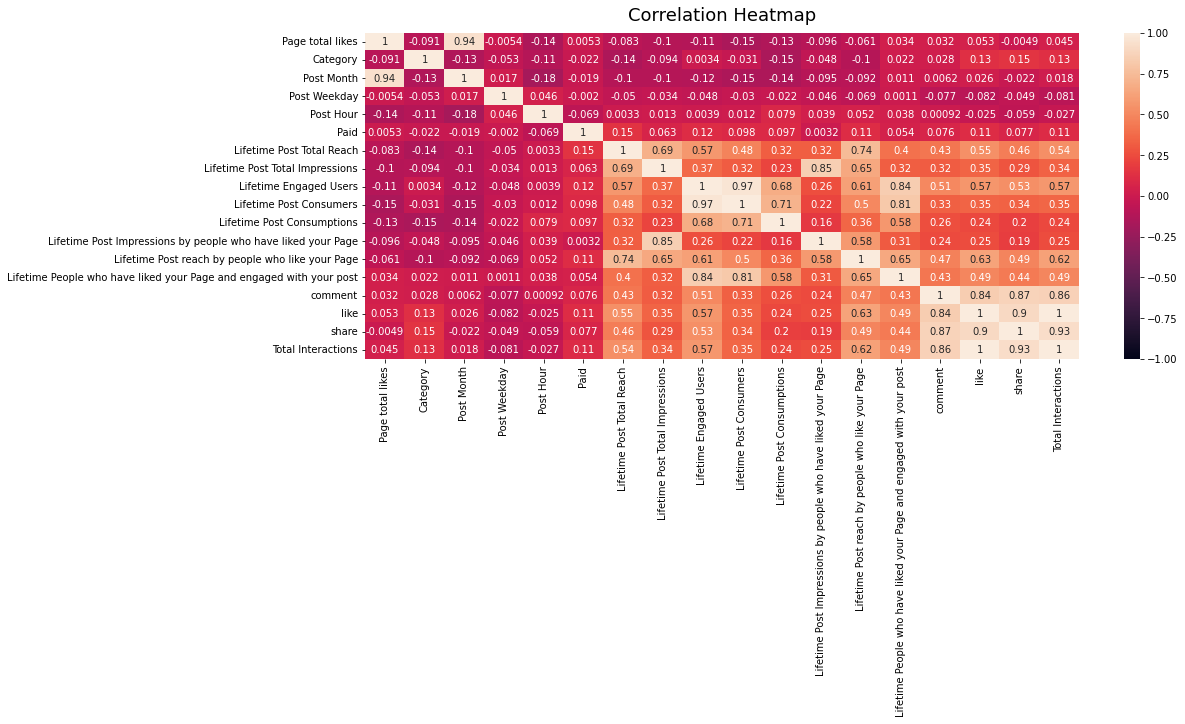

In [23]:
df.rename(columns={'Lifetime People who have liked your Page and engaged with your post': 'LPE'})
corr = df.corr()

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [24]:
X = df.iloc[:, 1:7]

Y = df.iloc[:, 14]
X.head()

,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,Photo,2,12,4,3,0.0
1,Status,2,12,3,10,0.0
2,Photo,3,12,3,3,0.0
3,Photo,2,12,2,10,1.0
4,Photo,2,12,2,3,0.0


In [42]:
ndf = df.copy()
ndf.rename(columns={'Lifetime People who have liked your Page and engaged with your post': 'LPE'}, inplace=True)
ndf.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [43]:
X, y = ndf.iloc[:,:7], ndf.iloc[:,14]
X

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,139441,Photo,2,12,4,3,0.0
1,139441,Status,2,12,3,10,0.0
2,139441,Photo,3,12,3,3,0.0
3,139441,Photo,2,12,2,10,1.0
4,139441,Photo,2,12,2,3,0.0
...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0
496,81370,Photo,2,1,5,8,0.0
497,81370,Photo,1,1,5,2,0.0
498,81370,Photo,3,1,4,11,0.0


#**Ejercicio-2.**

In [ ]:
None

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y
validación.

In [25]:
# Se realiza la particón de datos, en un grupo de 100 de prueba y 400 se repartirán entre entrenamiento y validación.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 7)
print(Xtrain.shape, ': Dimensión de datos de entrada para entrenamiento.')
print(Xtest.shape, ': Dimensión de datos de entrada para prueba.')  
print(Ytrain.shape, ': Dimensión de variable de salida para entrenamiento.')
print(Ytest.shape, ': Dimensión de variable de salida para prueba.')

(400, 6) : Dimensión de datos de entrada para entrenamiento.
(100, 6) : Dimensión de datos de entrada para prueba.
(400,) : Dimensión de variable de salida para entrenamiento.
(100,) : Dimensión de variable de salida para prueba.


In [44]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.20, random_state = 7)
 

print(Xtrain.shape, ': dimensión de datos de entrada para entrenamiento')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(Ytrain.shape, ': dimensión de variable de salida para entrenamiento')
print(Ytest.shape, ': dimensión de variable de salida para prueba')

(400, 7) : dimensión de datos de entrada para entrenamiento
(100, 7) : dimensión de datos de entrada para prueba
(400,) : dimensión de variable de salida para entrenamiento
(100,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

In [ ]:
None

Definirás tus propias funciones de errores para este problema de regresión. Los errores que
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el
error porcentual absoluto medio MAPE.

In [38]:
# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(y_true, y_pred):
    return (np.mean(np.square(y_true - y_pred)))**(1/2)


# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))


# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(y_true, y_pred):
    return (np.mean((np.abs(y_true - y_pred)/y_true)))*100

#**Ejercicio-4.**

In [ ]:
None

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida.
Utiliza un Pipeline para evitar el filtrado de información.

In [45]:
# Exploración variables 
# Buscamos valores nulos - NA 
ndf.isna().sum()

Page total likes                                                0
Type                                                            0
Category                                                        0
Post Month                                                      0
Post Weekday                                                    0
Post Hour                                                       0
Paid                                                            1
Lifetime Post Total Reach                                       0
Lifetime Post Total Impressions                                 0
Lifetime Engaged Users                                          0
Lifetime Post Consumers                                         0
Lifetime Post Consumptions                                      0
Lifetime Post Impressions by people who have liked your Page    0
Lifetime Post reach by people who like your Page                0
LPE                                                             0
comment   

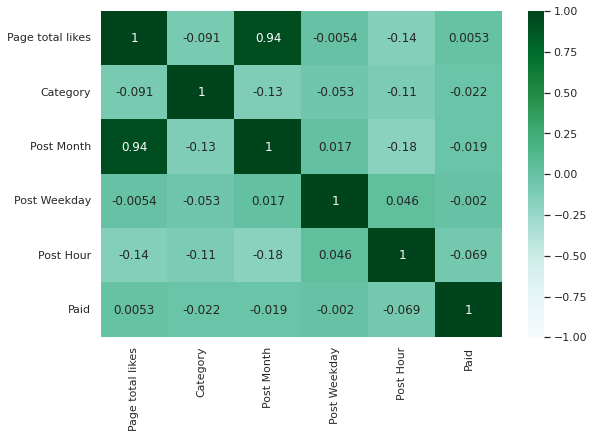

In [46]:
sns.set(rc={'figure.figsize':(9,6)})

sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='BuGn')
plt.show()

In [47]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Page total likes                                              500 non-null    int64  
 1   Type                                                          500 non-null    object 
 2   Category                                                      500 non-null    int64  
 3   Post Month                                                    500 non-null    int64  
 4   Post Weekday                                                  500 non-null    int64  
 5   Post Hour                                                     500 non-null    int64  
 6   Paid                                                          499 non-null    float64
 7   Lifetime Post Total Reach                                     500 non-n

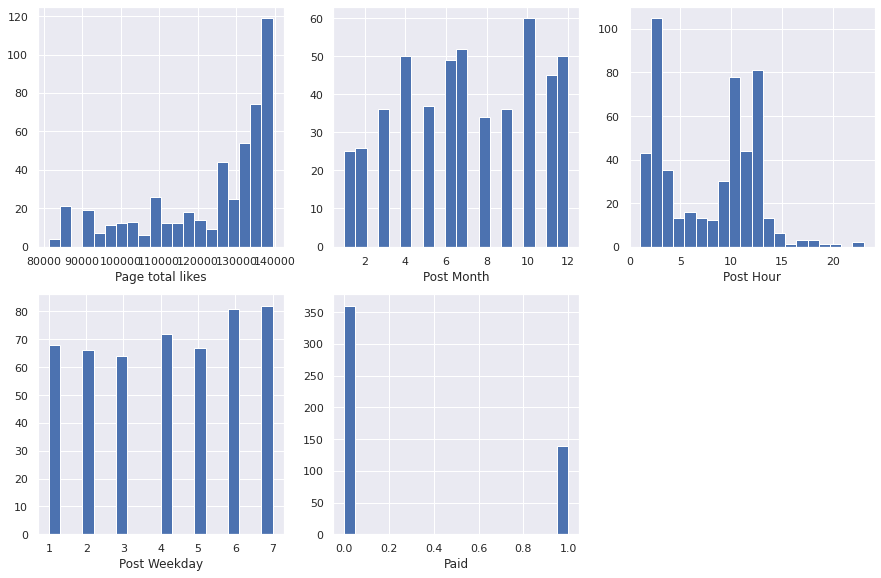

In [48]:
variables = ['Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']
sns.set(rc={'figure.figsize':(15,15)}) 

for x in range(0,5):
    plt.subplot(3,3, x+1) 
    var = ndf[variables[x]]
    
    plt.hist(var, bins=20)
    plt.xlabel(variables[x])
plt.show()

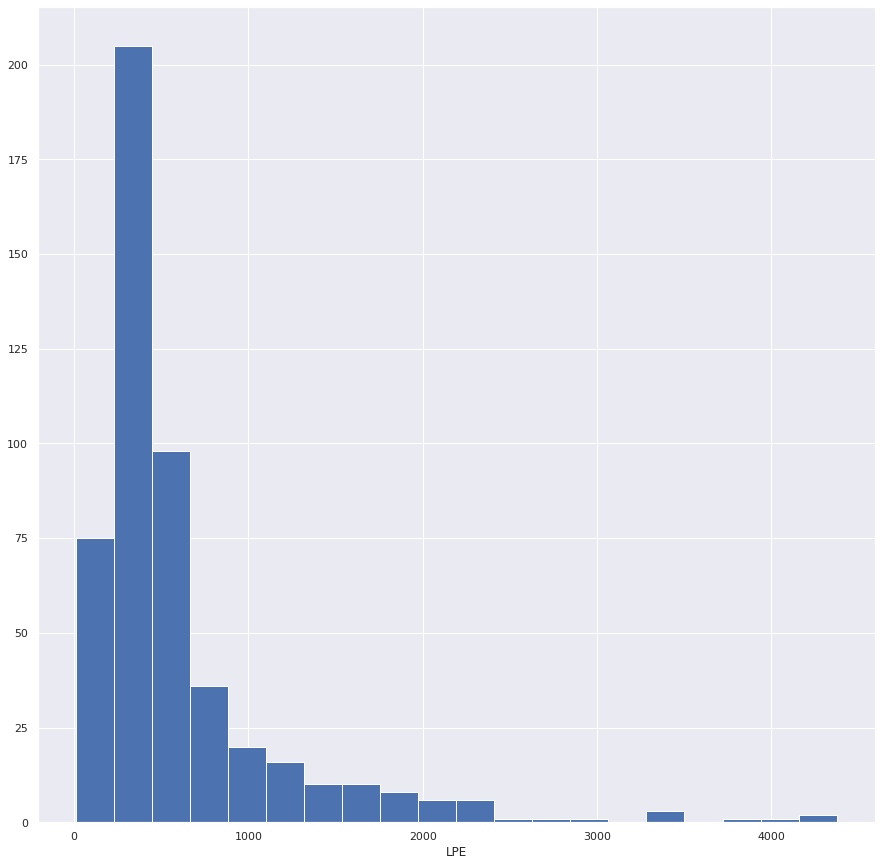

In [54]:
plt.hist(y, bins=20)
plt.xlabel('LPE')
plt.show()

#**Ejercicio-5.**

In [ ]:
None

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la
actividad. Consulta su documentación correspondiente:
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [68]:
# Dividimos nuestros datos de entrenamiento y validación 

#Partición de datos
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.25, random_state = 7)
 

print(X_train.shape, ': dimensión de datos de entrada para entrenamiento')
print(Y_test.shape, ': dimensión de datos de entrada para prueba')

(300, 7) : dimensión de datos de entrada para entrenamiento
(100,) : dimensión de datos de entrada para prueba


#**Ejercicio-6.**

In [ ]:
None

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o
subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de
iteraciones para que todos los modelos converjan.

In [70]:
def getModelos():
    modelos, nombres = list(), list()
    
    # Regresión Logística
    modelos.append(LogisticRegression())
    nombres.append('LR')
    
    # Bosque Aleatorio
    modelos.append(RandomForestClassifier())
    nombres.append('RFC')
    
    # Perceptrón multicapa
    modelos.append(MLPRegressor())
    nombres.append('MLP')
    
    return modelos, nombres

#**Ejercicio-7.**

In [ ]:
None

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación
obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que
encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

#**Ejercicio-8.**

In [ ]:
None

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.

#**Ejercicio-9.**

In [ ]:
None

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

#**Ejercicio-10.**

In [ ]:
None

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de
factores con este modelo con un diagrama de barras.

#**Ejercicio-11.**

In [ ]:
None

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de
factores con este modelo con un diagrama de barras.

#**Ejercicio-12.**

In [ ]:
None

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con
respecto a MAPE. Incluye tus conclusiones finales de la actividad.

###**Fin de la Actividad de la semana 7.**